# Miscellaneous arithmetic functions

> https://doc.sagemath.org/html/en/reference/rings_standard/sage/arith/misc.html

In [1]:
from sage.arith.misc import *

## CRT（中国剩余定理）

> https://en.wikipedia.org/wiki/Chinese_remainder_theorem

例如求解 x ：

$$
\begin{cases}x\equiv2\pmod3\\x\equiv3\pmod5\\x\equiv2\pmod7
\end{cases}
$$

具体使用如下，总体来说 `CRT_list` 使用最多。

In [2]:
# crt or CRT(a, b, m=None, n=None)
# Usually we let a and b be two lists, and b is pairwise coprime.

crt_problem = ([2,3,2],[3,5,7])
def chinese_remainder(problem: tuple) -> int:
    remainders = problem[0]
    modulus = problem[1]
    Sum = 0
    prod = reduce(lambda a, b: a*b, modulus)
    for m_i, r_i in zip(modulus, remainders):
        p = prod // m_i
        Sum += r_i * (inverse_mod(p,m_i)*p)
    return Sum % prod
chinese_remainder(crt_problem), crt(crt_problem[0], crt_problem[1])

(23, 23)

In [3]:
# CRT_list(values, moduli)

# It also works if the moduli are not coprime, but with non coprime moduli there is not always a solution:
CRT_list([32,2,2],[60,90,150]) # CRT_list([32,2,1],[60,90,150])

452

In [4]:
# CRT_vectors(X, moduli)
# just like using CRT many times at once

CRT_vectors([vector(ZZ, [2,3,1]), Sequence([1,7,8], ZZ)], [8,9])

[10, 43, 17]

## 素数与分解

### 素数

- `is_prime(n)` `n in Primes()` `pari(n).isprime()`判断是否为质数
- `is_prime_power(n)` `pari(n).isprimepower()` 判断是否为素数幂（根据素数唯一分解定理，只要是 a^b 前者都返回 True，后者返回一个元组 (b,a) 的最简式
    - `pari(n).ispower()` 效果类似
- `random_prime(n)` 生成一个 n 的随机质数
- `previous_prime(n)` 小于 n 的最大质数
- `next_prime(n)` 大于 n 的最小质数
- `previous_prime_power(n)` 小于 n 的最大素数幂
- `next_prime_power(n)` 大于 n 的最小素数幂

- `prime_pi(n)` `pari(n).primepi()` 小于 n 的质数个数，根据素数定理有 $prime\_pi(n) \approx \frac{n}{ln(n)}$
- `eratosthenes(n)` or `prime_range(n)` 小于 n 的质数列表
- `prime_powers(start, stop=None)` (0,start) or (start,stop-1) 之间的素数幂列表

- `nth_prime(n)` `pari(n).prime(n)` 第 n 个质数
- `primes_first_n(n)` 前 n 个质数
- `random_prime(n, lbound=2)` 生成一个 n 的随机质数，范围在 lbound 到 n 之间

### 素数分解

- `factor(n, proof, algothrim='pari')` 大数质分解，除 factordb 查表外，这个最快
- `prime_factors(n)` 同上，去除重复因子，保留为列表
- `number_of_divisors(n)` n 的因子个数
- `divisor(n)` n 的因子
- `factorial(n)` 求 n 的阶乘
- `trial_division(n, bound=None)` 返回小于等于 bound 的最小素因子；如果没有则返回 n 本身。


### 根号分解

- `Integer(a).nth_root(n, truncate_mode=False)` 求 $x^n=a$ 中的 x，trucate_mode 表示是否接受非完全n次方数；不接受时返回一个数，接收时返回一个元组，前者是开根结果，后者为是否完全开根的布尔值
- `Mod(a, p).nth_root(n, all=False)` 求 $x^n\equiv a\pmod{p}$ 中的 x，all=True 表示返回包括所有解的一个列表

In [5]:
Integer(10086).nth_root(3, truncate_mode=True), Mod(1, 7).nth_root(3,  all=True)

((21, False), [1, 4, 2])


### 平方和分解

- `is_squarefree(n)` 判断 n 是否为无平方因子数
- `is_square(n)` 判断 n 是否为完全平方数
- `two_squares(n)` 将 n 分解为两个平方和
- `three_squares(n)` 将 n 分解为三个平方和
- `four_squares(n)` 将 n 分解为四个平方和
- `sum_of_k_squares(k, n)` 将 n 分解为 k 个平方和

> 根据 [Devv.ai - gpt-4o-mini](https://devv.ai/search?threadId=e2j7avehvthc):

#### 1. 两平方和定理（Sum of Two Squares Theorem）

- **定理内容**：A positive integer  n is equal to the sum of two perfect squares if and only if the prime factorization of  n contains no odd exponent on any prime that is congruent to 3 modulo 4.
- 具体来说，如果 n 的质因数分解中包含形如$p^k$的项，其中 p 是一个质数， k是一个奇数，且 p 模4余3，那么 n 就不能表示为两个完全平方数之和。
- 也可以说，一个正整数 nn 可以表示为两个平方的和 $n=a^2+b^2$ 当且仅当在其素因数分解中，所有形如 $4^k(4m+3)$ 的素数的指数都是偶数。
- **例子**：例如，$5=1^2+2^2$ 可以表示为两个平方的和，而 71 不能。

#### 2. 三平方和定理（Legendre's Three Square Theorem）

- **定理内容**：一个正整数 nn 可以表示为三个平方的和 n=a2+b2+c2n=a2+b2+c2 当且仅当 n 不是形如 $4^k(8m+7)$ 的数。
- **例子**：例如，$13=3^2+2^2+0^2$ 可以表示为三个平方的和，而 71 不能。

#### 3. 四平方和定理（Lagrange's Four Square Theorem）

- **定理内容**：每个正整数 nn 都可以表示为四个平方的和 $n=a^2+b^2+c^2+d^2$
- **例子**：这下 71 终于能分解了：$71=2^2+3^2+3^2+7^2$


## Other

- `is_power_of_two(n)` 判断 n 是否为 2 的幂
- `gcd(a,b=None)` or `GCD(a, b=None)` 求 a 和 b 的最大公约数
    - a 可以是一个列表
- `xgcd(a,b)` 求 a 和 b 的最大公约数和扩展欧几里得算法
- `lcm(a,b=None)` 求 a 和 b 的最小公倍数及其乘积
- `xlcm(m, n)
- `euler_phi(n)` or `Euler_Phi()` 欧拉函数 $\varphi(x)=x\prod_{i=1}^n(1-\frac1{p_i})$

- `mod` or `Mod` 求模运算
- `power_mod(a, n, m)` 求 $a^n\bmod m$
- `inverse_mod(a, p)` 求 a 在模 p 意义下的逆元

- `sigma(n, k=1)` 求 n 的 k 次幂的因子和
- `differences(lis, n=1)` 效果如下

```python
sage: lis = [i^2 for i in range(1,11)]
sage: lis
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
sage: differences(lis)
[3, 5, 7, 9, 11, 13, 15, 17, 19]
sage: differences(lis, 2)
[2, 2, 2, 2, 2, 2, 2, 2]
sage: differences(lis, 3)
[0, 0, 0, 0, 0, 0, 0]
```

- `binomial(x, m)` 求组合数 $C_x^m = (_m^x)$
- `carmichael_lambda(n)` Carmichael 函数
    - $\lambda(n)$ 是使得 $a^{\lambda(n)}\equiv 1\pmod n$ 对所有 $a\perp n$ 成立的最小正整数 $\lambda(n)$
    - 如果 $n=p_1^{a_1}p_2^{a_2}\cdots p_k^{a_k}$，则 $\lambda(n)=\text{lcm}(\lambda(p_1^{a_1}),\lambda(p_2^{a_2}),\cdots,\lambda(p_k^{a_k}))$

- `coprime_part` & `smooth_part`
    - 10.5 新增，看文档感觉比较实用，暂存

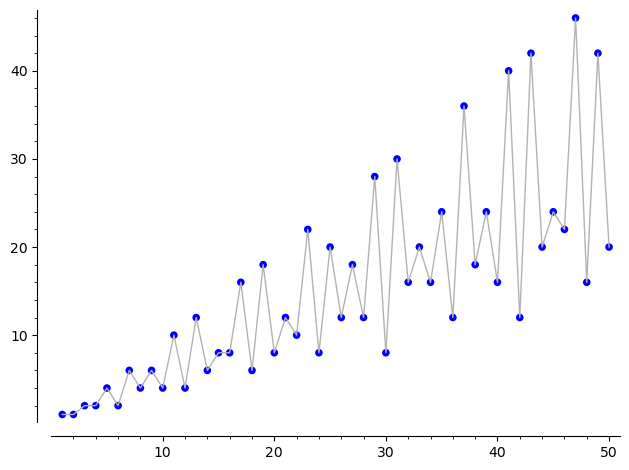

In [6]:
Euler_Phi().plot()

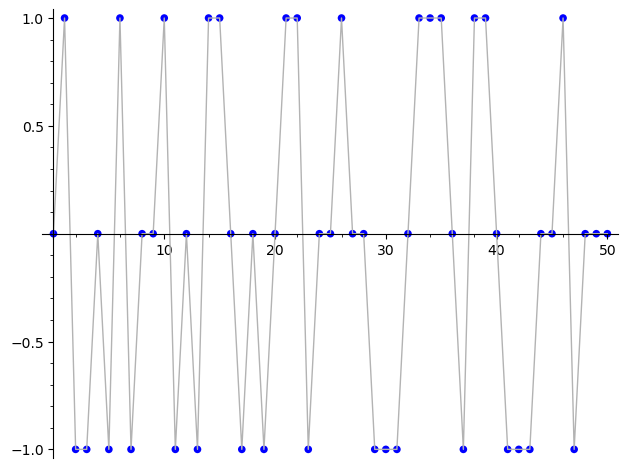

In [7]:
Moebius().plot() 